In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import norm
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as skmetric

In [ ]:
data=pd.read_csv('Churn_Modelling.csv')

In [ ]:
data.shape

(10000, 14)

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
data.describe(include='O')

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


In [ ]:
data[['Tenure', 'Exited']].groupby(['Tenure'], as_index=False).mean().sort_values(by='Exited', ascending=False)
#new-old seperation could be done. 

,Tenure,Exited
0,0,0.230024
1,1,0.224155
9,9,0.216463
3,3,0.211100
5,5,0.206522
10,10,0.206122
4,4,0.205258
6,6,0.202689
8,8,0.192195
2,2,0.191794


In [ ]:
data['Tenure']=['new' if (i==0 or i==1) else 'old' if (i==9 or i==10) else 'medium' if (i==3 or i==4 or i==5 or i==6) else 'random' for i in data.Tenure]

In [ ]:
data['Tenure'] = data['Tenure'].map( {'new': 0, 'old': 1, 'medium': 2, 'random': 4} ).astype(int)

In [ ]:
data[['NumOfProducts', 'Exited']].groupby(['NumOfProducts'], as_index=False).mean().sort_values(by='Exited', ascending=False)

,NumOfProducts,Exited
3,4,1.000000
2,3,0.827068
0,1,0.277144
1,2,0.075817


In [ ]:
data['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [ ]:
data[['HasCrCard', 'Exited']].groupby(['HasCrCard'], as_index=False).mean().sort_values(by='Exited', ascending=False)

,HasCrCard,Exited
0,0,0.208149
1,1,0.201843


In [ ]:
data[['IsActiveMember', 'Exited']].groupby(['IsActiveMember'], as_index=False).mean().sort_values(by='Exited', ascending=False)

,IsActiveMember,Exited
0,0,0.268509
1,1,0.142691


In [ ]:
data[['Gender', 'Exited']].groupby(['Gender'], as_index=False).mean().sort_values(by='Exited', ascending=False)

,Gender,Exited
0,Female,0.250715
1,Male,0.164559


In [ ]:
data['Gender'] = data['Gender'].map( {'Female': 1, 'Male': 0} ).astype(int)

In [ ]:
data[['Geography', 'Exited']].groupby(['Geography'], as_index=False).mean().sort_values(by='Exited', ascending=False)

,Geography,Exited
1,Germany,0.324432
2,Spain,0.166734
0,France,0.161548


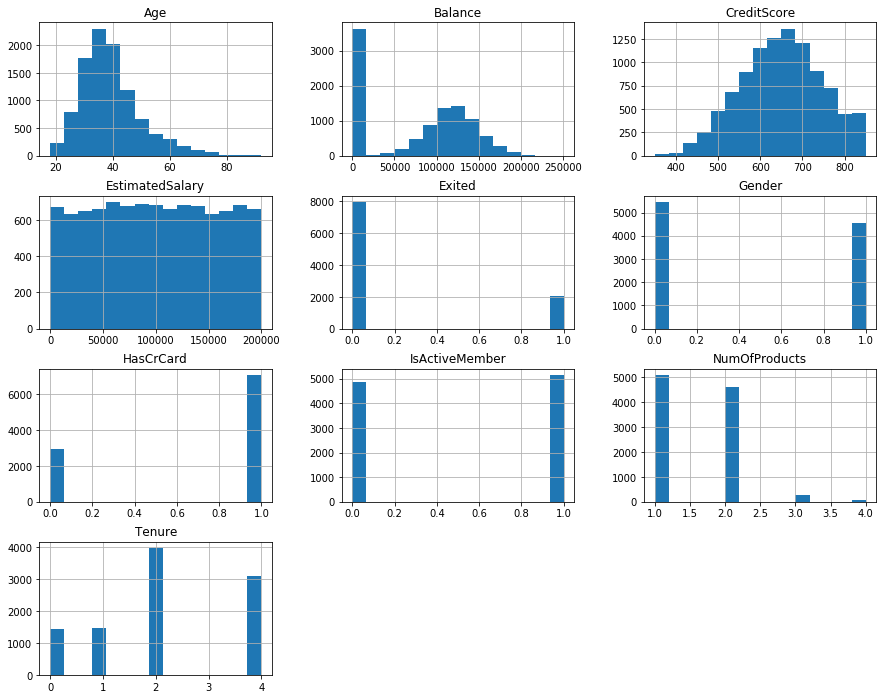

In [ ]:
data.hist(figsize=(15,12),bins = 15)
plt.show()

In [ ]:
sns.distplot(data.CreditScore,fit=norm)

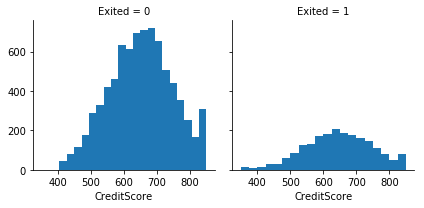

In [ ]:
g = sns.FacetGrid(data, col='Exited')
g.map(plt.hist, 'CreditScore', bins=20)
#credit score high does not exit. credit score low exits. ranking could be done.

In [ ]:
data['ScoreBand'] = pd.cut(data['CreditScore'], 5)
data[['ScoreBand', 'Exited']].groupby(['ScoreBand'], as_index=False).mean().sort_values(by='ScoreBand', ascending=True)

,ScoreBand,Exited
0,"(349.5, 450.0]",0.322751
1,"(450.0, 550.0]",0.214385
2,"(550.0, 650.0]",0.207780
3,"(650.0, 750.0]",0.192496
4,"(750.0, 850.0]",0.195870


In [ ]:
data.loc[data['CreditScore'] <= 450, 'CreditScore'] = 0
data.loc[(data['CreditScore'] > 450) & (data['CreditScore'] <= 550), 'CreditScore'] = 1
data.loc[(data['CreditScore'] > 550) & (data['CreditScore'] <= 650), 'CreditScore'] = 2
data.loc[(data['CreditScore'] > 650), 'CreditScore'] = 3
data.drop(columns='ScoreBand',inplace=True)

In [ ]:
sns.distplot(data.Age,fit=norm)

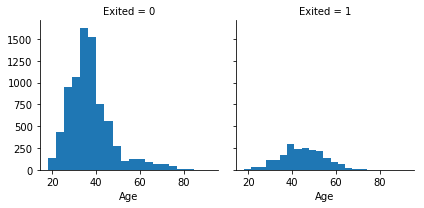

In [ ]:
g = sns.FacetGrid(data, col='Exited')
g.map(plt.hist, 'Age', bins=20)

In [ ]:
data['AgeBand'] = pd.cut(data['Age'], 5)
data[['AgeBand', 'Exited']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Exited
0,"(17.926, 32.8]",0.076344
1,"(32.8, 47.6]",0.188182
2,"(47.6, 62.4]",0.529978
3,"(62.4, 77.2]",0.214925
4,"(77.2, 92.0]",0.041667


In [ ]:
data.loc[data['Age'] <= 32.8, 'Age'] = 0
data.loc[(data['Age'] > 32.8) & (data['Age'] <= 47.6), 'Age'] = 1
data.loc[(data['Age'] > 47.6) & (data['Age'] <= 62.4), 'Age'] = 2
data.loc[(data['Age'] > 62.4) & (data['Age'] <= 77.2), 'Age'] = 3
data.loc[(data['Age'] > 77.2) , 'Age'] = 0
data.drop(columns='AgeBand',inplace=True)

In [ ]:
sns.distplot(data.Balance,fit=norm)

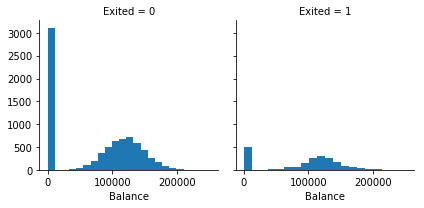

In [ ]:
g = sns.FacetGrid(data, col='Exited')
g.map(plt.hist, 'Balance', bins=20)
#balance low does not exit.

In [ ]:
sns.distplot(data.EstimatedSalary,fit=norm)

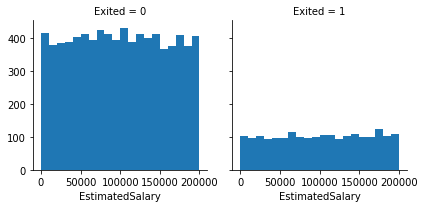

In [ ]:
g = sns.FacetGrid(data, col='Exited')
g.map(plt.hist, 'EstimatedSalary', bins=20)

In [ ]:
data = pd.get_dummies(data, columns=["Geography"],prefix='Country_is')

In [ ]:
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Country_is_France,Country_is_Germany,Country_is_Spain
0,2,1,1,4,0.00,1,1,1,101348.88,1,1,0,0
1,2,1,1,0,83807.86,1,0,1,112542.58,0,0,0,1
2,1,1,1,4,159660.80,3,1,0,113931.57,1,1,0,0
3,3,1,1,0,0.00,2,0,0,93826.63,0,1,0,0
4,3,1,1,4,125510.82,1,1,1,79084.10,0,0,0,1


In [ ]:
x=data.drop(columns=['Exited'])
y=data.Exited

In [ ]:
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [ ]:
from sklearn.model_selection import cross_val_score
model=DecisionTreeClassifier(random_state=42)
accuracies = cross_val_score(estimator = model, X = x_train, y= y_train, cv = 10)
print(accuracies)
print("average accuracy: ",np.mean(accuracies))
print("accuracy std: ",np.std(accuracies))

[0.80274657 0.78901373 0.77902622 0.77278402 0.7925     0.785
 0.77972466 0.76971214 0.76971214 0.7709637 ]
average accuracy:  0.7811183177629966
accuracy std:  0.010553798002544258


In [ ]:
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [ ]:
print('accuracy:',skmetric.accuracy_score(y_test,y_pred))
print('precision:',skmetric.precision_score(y_test,y_pred))
print('recall',skmetric.recall_score(y_test,y_pred))
print('f score',skmetric.f1_score(y_test,y_pred))

accuracy: 0.8045
precision: 0.5025
recall 0.5114503816793893
f score 0.506935687263556


[[1408  199]
 [ 192  201]]


Text(33,0.5,'y_true')

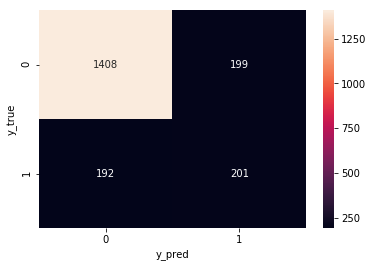

In [ ]:
cm=skmetric.confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True,fmt='.0f')
plt.xlabel('y_pred')
plt.ylabel('y_true')